In [1]:
# 导入基本包
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from mpl_toolkits import mplot3d #用于绘制3D图形

# 显示所有过程结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 一、基本原理

### （一）什么是梯度？

#### 1、从偏导数说起

（1）一元函数情况

对于一元函数 $y = f(x)$ 来说，偏导数实际上就是指的导数，其定义如下：

$$
\lim_{\Delta{x}\to 0}\frac{\Delta{y}}{\Delta{x}} = \lim_{\Delta{x} \to 0}\frac{f(x_0 + \Delta{x}) - f(x_0)}{\Delta{x}}
$$

几何意义：在点 $（x_0, y_0）$ 处的切线（ $y$ 关于 $x$ 的变化率），如下图：

<img src='.\pic1.png' width=400>

（2）多元函数情况（以二元函数为例，二元以上可类推）

对于二元函数 $Z = f(x, y)$，我们同样也可以定义：

① $Z$ 关于 $x$ 的偏导数可以定义如下：

$$
Z_x^{'} = f_x^{'}(x_0, y_0) = \lim_{\Delta{x}\to 0}\frac{\Delta{Z_x}}{\Delta{x}} = \lim_{\Delta{x} \to 0}\frac{f(x_0 + \Delta{x},\  y_0) - f(x_0,\  y_0)}{\Delta{x}}
$$

几何意义： $Z$ 关于 $x$ 的变化率，即： $y$ 不变， $x$ 变化， $Z$ 随之发生的变化量。

② $Z$ 关于 $y$ 的偏导数可以定义如下：

$$
Z_y^{'} = f_y^{'}(x_0, y_0) = \lim_{\Delta{y}\to 0}\frac{\Delta{Z_y}}{\Delta{y}} = \lim_{\Delta{y} \to 0}\frac{f(x_0,\  y_0 + \Delta{y}) - f(x_0,\  y_0)}{\Delta{y}}
$$

几何意义：$Z$ 关于 $y$ 的变化率，即： $x$ 不变， $y$ 变化， $Z$ 随之发生的变化量。 

#### 2、方向导数

上述定义了多元函数的偏导数，但是偏导数只是描述了函数在**某一个变量方向上**的的变化率，但是对于多元函数来说，某一点上有无数个变化方向，那么我们如何衡量多元函数向**任意一个方向**变化的变化率呢？答案就是**方向导数**。

还是以二元函数 $Z = f(x, y)$ 为例。如下图：

<img src='.\pic2.png' width=600>

点 $（x_0, y_0）$ 沿着 $\vec{l}$ 方向变化，变化量为向量 $(\Delta x, \Delta y)$ 的长度。 那么此时 $Z$ 的变化率就为：

$$
\left. \frac{\partial Z^{'}}{\partial \vec{l}} \right|_{(x_0,\  y_0 \ )}  = \lim_{{\Delta{x}\to 0}\\{\Delta{y}\to 0}}\frac{\Delta{Z_{(x,y)}}}{\sqrt{(\Delta x)^2 + (\Delta y)^2 }} = \lim_{{\Delta{x}\to 0}\\{\Delta{y}\to 0}}\frac{f(x_0 + \Delta{x},\  y_0 + \Delta{y}) - f(x_0,\  y_0)}{\sqrt{(\Delta x)^2 + (\Delta y)^2 }} \tag{1}
$$

令 $t = \sqrt{(\Delta x)^2 + (\Delta y)^2 }$，则 ${\Delta x} = tcos\alpha$，${\Delta y} = tcos\beta$。因此定义式 $(1)$ 可以变换为：

$$
\left. \frac{\partial Z^{'}}{\partial \vec{l}} \right|_{(x_0,\  y_0 \ )} = \lim_{t \to 0}\frac{f(x_0 + tcos\alpha,\  y_0 + tcos\beta) - f(x_0,\  y_0)}{t} \tag{2}
$$

那么我们如何计算方向导数呢？首先函数在某一点 $P_0(x_0, y_0)$ 处方向导数存在的充分条件是函数 $Z = f(x,y)$ 在该点可微。根据可微的定义可知：

$$
\Delta Z = f^{'}_x {\Delta x} + f^{'}_y {\Delta y} + \omicron (\sqrt{(\Delta x)^2 + (\Delta y)^2 }) \tag{3}
$$

$$
\begin{align}
(3)式 & \Rightarrow f(x_0 + tcos\alpha,\  y_0 + tcos\beta) - f(x_0,\  y_0) = f^{'}_x{tcos \alpha} + f^{'}_y{tcos \beta} + \omicron (t) \\
\\
& \Rightarrow \lim_{t \to 0}\frac{f(x_0 + tcos\alpha,\  y_0 + tcos\beta) - f(x_0,\  y_0)}{t} = \lim_{t \to 0}\frac{f^{'}_x{tcos \alpha}}{t} + \lim_{t \to 0}\frac{f^{'}_y{tcos \beta}}{t} + \lim_{t \to 0}\frac{\omicron (t)}{t} \\
\\
& \Rightarrow \left. \frac{\partial Z^{'}}{\partial \vec{l}} \right|_{(x_0,\  y_0 \ )} = f^{'}_x{cos \alpha} + f^{'}_y{cos \beta} \tag{4}
\end{align}
$$

#### 3、梯度

进一步引入向量内积的概念。向量 $\vec{\alpha}(a_1, a_2)$ 与 $\vec{\beta}(b_1, b_2)$ 的内积，其基本定义为：

$$
\vec{\alpha} \bullet \vec{\beta} = {a_1}{b_1} + {a_2}{b_2}
$$

几何定义为：

$$
\vec{\alpha} \bullet \vec{\beta} = |{\vec{\alpha}}| |{\vec{\beta}}|{cos\theta} \ \ （\theta 为 \vec{\alpha} 与 \vec{\beta} 之间的夹角）
$$

因此，我们方向导数 $(4)$ 式可以写成向量内积的形式，如下：
$$
\begin{align}
 \left. \frac{\partial Z^{'}}{\partial \vec{l}} \right|_{(x_0,\  y_0 \ )} & = f^{'}_x{cos \alpha} + f^{'}_y{cos \beta} \\
 \\
& = \color {#F00}{(f^{'}_x, \ f^{'}_y)} \bullet \color {#08F}{({cos \alpha}, \ {cos \beta})} \tag{5}
\end{align}
$$

我们将上述 $(5)$ 式中 ${(f^{'}_x, \ f^{'}_y)}$ 称为 **梯度向量** ，记作：$\pmb{grad}f(x_0, y_0)$，或者 $\pmb{\nabla} f(x_0, y_0)$。这里切记，**梯度是个向量**。 向量 ${({cos \alpha}, \ {cos \beta})}$ 其实就是变化方向$\vec{l}$上的单位向量。

### （二）为什么梯度方向（正、反）是函数值局部变化（上升、下降）最快的方向？

根据上述定义，方向导数其实就是梯度向量和变化方向上的单位向量的内积。即：

$$
\begin{align}
& \left. \frac{\partial Z^{'}}{\partial \vec{l}} \right|_{(x_0,\  y_0 \ )} = \pmb{\nabla} f(x_0, y_0) \bullet \vec{e}
\\
\\
& 其中， \pmb{\nabla} f(x_0, y_0) = (f^{'}_x, \ f^{'}_y)； \ \vec{e} = (cos\alpha, \ cos\beta)，为变化方向\ \vec{l}\ 上的单位向量
\end{align}
$$

如下图：

<img src='.\pic3.png' width=500>

根据内积几何定义可得：

$$
\begin{align}
& \left. \frac{\partial Z^{'}}{\partial \vec{l}} \right|_{(x_0,\  y_0 \ )} = |\pmb{\nabla} f(x_0, y_0)| |\vec{e}| cos\theta
\end{align}
$$

当 $cos\theta = 1$，即： $\theta=0$ 时，也就是说当变化方向与梯度**同向**时， 方向导数取**正数最大值**，因此，函数**上升最快**。

当 $cos\theta = -1$，即： $\theta=\pi$ 时，也就是说当变化方向与梯度**反向**时， 方向导数取**负数最小值**，因此，函数**下降最快**。

### （三）梯度下降法

#### 1、基本原理

那么什么是梯度下降法呢？首先我们要明确，梯度下降法（Gradient Descent）并不是一个机器学习算法，而是一种基于搜索的最优化方法。通过梯度下降法，能够最小化一个损失函数。


以线性回归为例，我们的损失函数为：

$$ J(\theta) = \sum_{i=1}^{m}(y^{(i)} - \widehat{y}^{(i)})^2 = \sum_{i=1}^{m}(y^{(i)} - (\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}))^2 $$

我们的目标是最优化损失函数 $J(\theta)$，即：找到一组参数 $\theta(\theta_0, \theta_1, \theta_2, ... \theta_n)$ 使得 $J(\theta)$ 最小。

由于**损失函数 $J(\theta)$ 是关于 $\theta$ 的函数，所以我们只要控制 $\theta$ 朝着 $J(\theta)$ 下降最快（梯度负方向）的方向进行变化，就最终能找到 $J(\theta)$ 的局部最小值。**

如何控制参数向量 $\theta$ 向着 $J(\theta)$ 下降最快的方向进行变化呢？方法就是在梯度的负方向上进行逐步增量，用公式表示就是：

$$
\theta_{new} = \theta_{old} - \eta\pmb{\nabla}J(\theta_{old}) \\
$$
其中：

（1）负号表示“负方向”； 

（2）$\eta$ 为学习率，是控制 $\theta$ 向着 $J(\theta)$ 的局部最小值进行变化的步长，学习率 $\eta$ 不宜过大（太大容易跑过局部最小值），也不宜太小（太小前进的速度太缓慢）； 

（3）$\pmb{\nabla}J(\theta)$ 为梯度向量，梯度向量控制变化方向。

**注意：** 一定要形成，$\theta$ 和梯度$\pmb{\nabla}$都是向量的概念，向量是$\pmb{\color{#F00}{有方向的}}$。

我们以单一参数的损失函数 $J(\theta)$ 为例，以图形进行直观地展示，如下：

<img src='.\pic4.png' width=800>

如上图，我们首先初始化一个参数向量 $\theta_0$，由于这里只是单参数，所以向量 $\theta_0$ 就是一个标量（为了使向量的概念深深引入脑海，这里也将其当作一个特殊向量），梯度 $\pmb{\nabla}{J(\theta_0)} = \frac{dJ}{d\theta}$。我们将初始化的参数向量 $\theta_0$ 向着梯度的负方向进行更新，得到新的参数向量。即： $\theta_1 = \theta_0 - \eta \frac{dJ}{d\theta}$ ，继续更新$\theta_2 = \theta_1 - \eta \frac{dJ}{d\theta}$，只到损失函数 $J(\theta)$ 达到（局部）最小。

那我们什么时候停止迭代呢？因为在沿着梯度的方向进行迭代时， $J(\theta)$ 逐渐接近局部最小值，相应地，梯度也会逐渐趋向0，因此前进的步子也会越来越小。根据这一特性，我们可以设计参数迭代的收敛条件如下：

(1) $\pmb{\color {#F00}{迭代的过程中\theta的值变化很小时，迭代收敛。即： \theta_{new} - \theta_{old} 非常小（设定一个收敛阈值）；}}$

(2) $\pmb{\color {#F00}{迭代的过程中 J(\theta) 的值变化很小时，迭代收敛。即：J(\theta_{new}) - J(\theta_{old}) 非常小（设定一个收敛阈值）}}$

#### 2、学习率的选择

（1）学习率过小

<img src='.\pic5.png' width=600>

如图，学习率太小，会导致收敛速度缓慢。

（2）学习率过大

<img src='.\pic6.png' width=600>

如图，学习率太大，可能会越过最小值点，导致最终无法收敛。

在实践中，一般选择 $\eta = 0.01$。

#### 3、全局最小值与局部最小值的问题

<img src='.\pic7.png' width=600>

如上图，损失函数 $J(\theta)$ 是一个具有两个极值点的函数，当我们初始点设置在“初始点1”时，我们就会滑入一个局部最优解，而不能找到真正的全局最优解。如何解决这个问题呢？解决方法就是**多次随机化初始点**，以期望能找到类似“初始点2”这样的能够滑入全局最优解的点。

### （四）补充：梯度上升法

$$
\theta_{new} = \theta_{old} + \eta\pmb{\nabla}J(\theta_{old}) \\
$$

## 二、模拟实现与原理可视化展示

### （一）单一参数

#### 1、分步验证

array([-2.        , -1.83673469, -1.67346939, -1.51020408, -1.34693878,
       -1.18367347, -1.02040816, -0.85714286, -0.69387755, -0.53061224,
       -0.36734694, -0.20408163, -0.04081633,  0.12244898,  0.28571429,
        0.44897959,  0.6122449 ,  0.7755102 ,  0.93877551,  1.10204082,
        1.26530612,  1.42857143,  1.59183673,  1.75510204,  1.91836735,
        2.08163265,  2.24489796,  2.40816327,  2.57142857,  2.73469388,
        2.89795918,  3.06122449,  3.2244898 ,  3.3877551 ,  3.55102041,
        3.71428571,  3.87755102,  4.04081633,  4.20408163,  4.36734694,
        4.53061224,  4.69387755,  4.85714286,  5.02040816,  5.18367347,
        5.34693878,  5.51020408,  5.67346939,  5.83673469,  6.        ])

array([21.        , 19.72053311, 18.49437734, 17.32153269, 16.20199917,
       15.13577676, 14.12286547, 13.16326531, 12.25697626, 11.40399833,
       10.60433153,  9.85797584,  9.16493128,  8.52519783,  7.93877551,
        7.40566431,  6.92586422,  6.49937526,  6.12619742,  5.8063307 ,
        5.53977509,  5.32653061,  5.16659725,  5.05997501,  5.00666389,
        5.00666389,  5.05997501,  5.16659725,  5.32653061,  5.53977509,
        5.8063307 ,  6.12619742,  6.49937526,  6.92586422,  7.40566431,
        7.93877551,  8.52519783,  9.16493128,  9.85797584, 10.60433153,
       11.40399833, 12.25697626, 13.16326531, 14.12286547, 15.13577676,
       16.20199917, 17.32153269, 18.49437734, 19.72053311, 21.        ])

<Figure size 432x288 with 0 Axes>

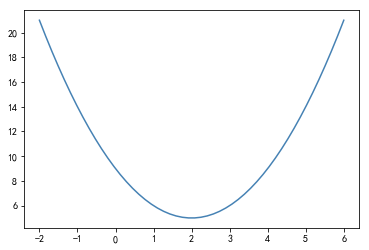

In [57]:
# 生成模拟数据
plot_theta = np.linspace(-2., 6., 50)
plot_theta

plot_J = (plot_theta - 2) ** 2 + 5
plot_J

# 绘图
plt.figure()
plt.plot(plot_theta, plot_J, color='steelblue')
plt.show()

In [58]:
# 定义损失函数
def Func_J(theta):
    return (theta - 2) ** 2 + 5

# 定义求导（求梯度）函数
def grad(theta):
    return 2 * (theta - 2)

# 以theta变化极小作为收敛条件
eta = 0.1  # 学习率
epsilon = 1e-8  # 收敛阈值
theta = 0.0  # 初始theta
i = 0
while True:
    gradient = grad(theta)
    theta_old = theta
    theta = theta_old - eta * gradient
    i += 1
    
    if abs(theta - theta_old) < epsilon:
        break

print('一共迭代了{}次'.format(i))
print('以theta变化极小作为收敛方式时得到的参数theta为：{}'.format(theta))
print('以theta变化极小作为收敛方式时得到的最小值为：{}'.format(Func_J(theta)))


# 以J(theta)变化极小作为收敛条件
eta = 0.1  # 学习率
epsilon = 1e-8  # 收敛阈值
theta = 0.0  # 初始theta
i = 0
while True:
    gradient = grad(theta)
    theta_old = theta
    theta = theta_old - eta * gradient
    i += 1
    if abs(Func_J(theta) - Func_J(theta_old)) < epsilon:
        break
        
print('一共迭代了{}次'.format(i))
print('以J变化极小作为收敛方式时得到的参数theta为：{}'.format(theta))
print('以J变化极小作为收敛方式时得到的最小值为：{}'.format(Func_J(theta)))

一共迭代了80次
以theta变化极小作为收敛方式时得到的参数theta为：1.9999999646630588
以theta变化极小作为收敛方式时得到的最小值为：5.000000000000001
一共迭代了44次
以J变化极小作为收敛方式时得到的参数theta为：1.999891109642585
以J变化极小作为收敛方式时得到的最小值为：5.00000001185711


1.999891109642585

5.00000001185711

<Figure size 432x288 with 0 Axes>

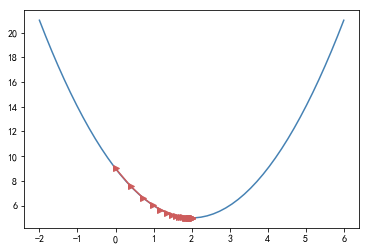

一共迭代了45次


In [59]:
# 绘图展示梯度下降过程

def Func_J(theta):
    return (theta - 2) ** 2 + 5

def grad(theta):
    return 2 * (theta - 2)

eta = 0.1
epsilon = 1e-8
theta = 0.0
theta_list = [theta]
while True:
    gradint = grad(theta)
    theta_old = theta
    theta = theta_old - eta * gradint  
    theta_list.append(theta)
    
    if abs(Func_J(theta) - Func_J(theta_old)) < epsilon:
        break

theta
Func_J(theta)
        
plt.figure()
plt.plot(plot_theta, plot_J, color='steelblue')
plt.plot(np.array(theta_list), Func_J(np.array(theta_list)), color='indianred', marker='>')
plt.show()
print('一共迭代了{}次'.format(len(theta_list)))

#### 2、简单封装

In [60]:
class GradientDescent(object):
    
    def __init__(self, eta=0.1, epsilon=1e-8, initial_theta=0.0, n_iters=1e4):
        self.eta = eta
        self.epsilon = epsilon
        self.theta = initial_theta
        self.theta_list = [initial_theta]
        
        self.n_iters = n_iters
        self.i_iter = 0
        self.i_iter_list =  []
        
    def Func_J(self, theta):
        return (theta - 2) ** 2 + 5
    
    def grad(self, theta):
        return 2 * (theta - 2)
    
    def gradient_descent(self):

        while self.i_iter < self.n_iters:
            theta_old = self.theta
            self.theta = self.theta - self.eta * self.grad(theta_old)
            self.theta_list.append(self.theta)
            self.i_iter_list.append(self.i_iter)
            
            if abs(self.Func_J(self.theta) - self.Func_J(theta_old)) < self.epsilon:
                break
                
            self.i_iter += 1
                
        return self
                
    def plot_theta_history(self):
        plot_theta = np.linspace(-2., 6., 50)
        plot_J = (plot_theta - 2) ** 2 + 5
        
        plt.figure()
        plt.title('梯度下降过程图')
        plt.plot(plot_theta, plot_J, color='steelblue')
        plt.plot(np.array(self.theta_list), Func_J(np.array(self.theta_list)), color='indianred', marker='>')
        plt.show()
        
        print('一共迭代了{}次'.format(len(self.theta_list) - 1))
        
    def plot_J_history(self):
        plt.figure()
        plt.title('损失函数变化图')
        plt.plot(np.array(self.i_iter_list), Func_J(np.array(self.theta_list[1:])), color='steelblue')
        plt.show()
        
    def __repr__(self):
        return 'GradientDescent()'

In [62]:
%matplotlib inline
@interact(eta=(0.0, 2.0, 0.0001), epsilon=(1e-8,1,1e-9), n_iters=(1,1e4,1), initial_theta=(-2,6,0.01), continuous_update=False)
# eta为学习率（步长）； n_iters为最大迭代次数； init_theta为初始参数
def visualize(eta=0.1, epsilon=1e-8, initial_theta=0.0, n_iters=1e4):
    try:
        GD = GradientDescent(eta, epsilon, initial_theta, n_iters)
        GD.gradient_descent()
        GD.plot_theta_history()
        
        print('最终参数为：{}'.format(GD.theta))
        print('学习率为：{}'.format(eta))
        print('收敛阈值为：{}'.format(epsilon))
        print('初始参数为：{}'.format(initial_theta))
        print('可迭代最大次数为：{}'.format(n_iters))
        
        GD.plot_J_history()
        
    except OverflowError:
        print('(34, \'Result too large\')')

interactive(children=(FloatSlider(value=0.1, description='eta', max=2.0, step=0.0001), FloatSlider(value=1e-08…

#### 3、学习率的选择

GradientDescent()

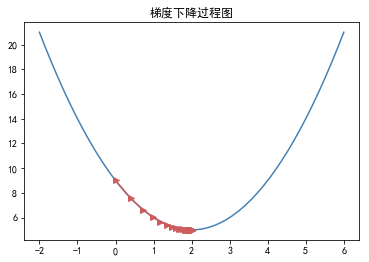

一共迭代了44次


1.999891109642585

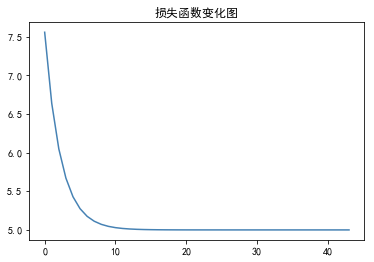

In [7]:
# 学习率为0.1 （合适）
GD_1 = GradientDescent(eta=0.1, epsilon=1e-8, initial_theta=0.0)
GD_1.gradient_descent()
GD_1.plot_theta_history()
GD_1.theta
GD_1.plot_J_history()

GradientDescent()

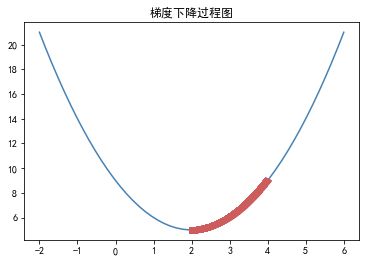

一共迭代了3569次


2.0015773637295693

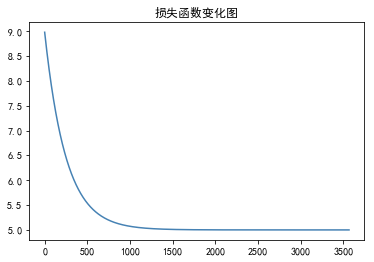

In [8]:
# 学习率为0.001 （太小，收敛缓慢）
GD_2 = GradientDescent(eta=0.001, epsilon=1e-8, initial_theta=4.0)
GD_2.gradient_descent()
GD_2.plot_theta_history()
GD_2.theta
GD_2.plot_J_history()

GradientDescent()

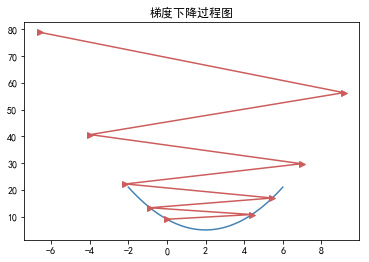

一共迭代了8次


-6.599633920000013

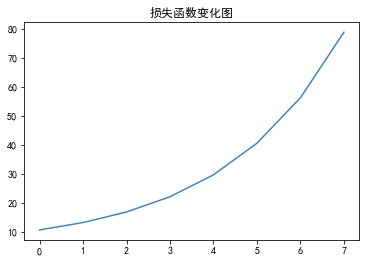

In [9]:
# 学习率为1.1 （过大，不收敛）
GD_3 = GradientDescent(eta=1.1, epsilon=1e-8, initial_theta=0.0, n_iters=8)
GD_3.gradient_descent()
GD_3.plot_theta_history()
GD_3.theta
GD_3.plot_J_history()

### （二）双参数

In [63]:
#梯度函数
def Func_J(x, y):
    return 2 * np.power(x, 2) + np.power(y, 2)

#梯度函数的导数
def grad_theta_1(theta):
    return 4 * theta
def grad_theta_2(theta):
    return 2 * theta

def gradient_descent(eta, n_iters, theta1, theta2, up, dirc):
    t1 = [theta1]
    t2 = [theta2]
    for i in range(n_iters):
        gradient = grad_theta_1(theta1)
        theta1 = theta1 - eta * gradient
        t1.append(theta1)
        gradient = grad_theta_2(theta2)
        theta2 = theta2 - eta * gradient
        t2.append(theta2)
        
    plt.figure(figsize=(10,10))  #设置画布大小
    # 生成虚拟数据
    x = np.linspace(-3,3,30)
    y = np.linspace(-3,3,30)
    
    # 转换成网格数据
    X, Y = np.meshgrid(x, y)
    Z = Func_J(X, Y)    
    ax = plt.axes(projection='3d')
    fig =plt.figure()
    ax.contour3D(X, Y, Func_J(X,Y), 50, cmap='binary') #等高线图
    
    ax.scatter3D(t1, t2, Func_J(t1,t2), c='r',marker = 'o')

    ax.view_init(up, dirc)
    
    return t1, t2

%matplotlib inline
@interact(eta=(0, 2, 0.0002),n_iters=(1,100,1),initial_theta1=(-3,3,0.1),initial_theta2=(-3,3,0.1),up=(-180,180,1),dirc=(-180,180,1),continuous_update=False)
#lr为学习率（步长） epoch为迭代次数   init_theta为初始参数的设置 up调整图片上下视角 dirc调整左右视角
def visualize_gradient_descent(eta=0.05,n_iters=10,initial_theta1=-2,initial_theta2=-3,up=45,dirc=100):
    gradient_descent(eta,n_iters,initial_theta1,initial_theta2,up,dirc)

interactive(children=(FloatSlider(value=0.05, description='eta', max=2.0, step=0.0002), IntSlider(value=10, de…

## 三、线性回归中的梯度下降法

### （一）基本原理

对于一元线性回归，其损失函数如下：

$$ 
J(\theta) = \sum_{i=1}^{m}(y^{(i)} - \widehat{y}^{(i)})^2 = \sum_{i=1}^{m}(y^{(i)} - (\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}))^2 
$$

令 $\theta = (\theta_0, \theta_1, \theta_2,\ ... \,\theta_n)^{T}, \ x = (x_0, x_1, x_2, ..., x_n), \ x_0 \equiv 1$，则上式可以写成下面的形式

$$
J(\theta) = \sum_{i=1}^{m}(y^{(i)} - x^{(i)}\theta)^2 
$$

进一步考虑到样本量的影响，将上式除以一个样本量 $m$，得到：

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - x^{(i)}\theta)^2 \tag{1}
$$


我们将 $(1)$ 式作为我们最终的损失函数。因此，我们的目标就是最优化 $(1)$ 式。

对损失函数求关于 $\theta(\theta_0, \theta_1, \theta_2,\ ... \,\theta_n)^{T}$ 的梯度：

$$
\nabla J(\theta) = (\frac{\partial J(\theta)}{\partial \theta_0}, \ \frac{\partial J(\theta)}{\partial \theta_1}, \ \frac{\partial J(\theta)}{\partial \theta_2}, \ ... \ , \ \frac{\partial J(\theta)}{\partial \theta_n})^{T}
$$


$$
\begin{align}
\nabla J(\theta) &=
    \begin{pmatrix}
    \frac {\partial J(\theta)}{\partial \theta_0}
    \\ \\
    \frac {\partial J(\theta)}{\partial \theta_1}
    \\ \\
    \frac {\partial J(\theta)}{\partial \theta_2} 
    \\ \\
    ...
    \\ \\
    \frac {\partial J(\theta)}{\partial \theta_n}
    \end{pmatrix}
    _{(n+1) \times 1}
=
    \begin{pmatrix}
    \sum_{i=1}^{m}{\frac{2}{m}}{[y^{(i)} - (\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}})]}(-x_0^{(i)}) 
    \\ \\
    \sum_{i=1}^{m}{\frac{2}{m}}{[y^{(i)} - (\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}})]}(-x_1^{(i)}) 
    \\ \\
    \sum_{i=1}^{m}{\frac{2}{m}}{[y^{(i)} - (\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}})]}(-x_2^{(i)}) 
    \\ \\
    ...
    \\ \\
    \sum_{i=1}^{m}{\frac{2}{m}}{[y^{(i)} - (\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}})]}(-x_n^{(i)}) 
    \end{pmatrix}
    _{(n+1) \times 1} \\ \\
&=\frac{2}{m}
    \begin{pmatrix}
    \sum_{i=1}^{m}(x_0^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
    \\ \\
    \sum_{i=1}^{m}(x_1^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
    \\ \\
    \sum_{i=1}^{m}(x_2^{(i)}){[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
    \\ \\
    ...
    \\ \\
    \sum_{i=1}^{m}(x_n^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
    \end{pmatrix}
    _{(n+1) \times 1} \\ \\
&=\frac{2}{m}
    \begin{pmatrix}
    x_0^{(1)} & x_0^{(2)} & x_0^{(3)} & \cdots & x_0^{(m)} 
    \\ \\
    x_1^{(1)} & x_1^{(2)} & x_1^{(3)} & \cdots & x_1^{(m)} 
    \\ \\
    x_2^{(1)} & x_2^{(2)} & x_2^{(3)} & \cdots & x_2^{(m)} 
    \\ \\
    \vdots & \vdots & \vdots & \ddots & \vdots 
    \\ \\
    x_n^{(1)} & x_n^{(2)} & x_n^{(3)} & \cdots & x_n^{(m)}
    \end{pmatrix}
    _{(n+1) \times m}
    \times
    \begin{pmatrix}
    (x_{0}^{(1)}\theta_0 + x_{1}^{(1)}\theta_1 + x_{2}^{(1)}\theta_2 + ... + x_{n}^{(1)}\theta_n) - y^{(1)}
    \\ \\
    (x_{0}^{(2)}\theta_0 + x_{1}^{(2)}\theta_1 + x_{2}^{(2)}\theta_2 + ... + x_{n}^{(2)}\theta_n) - y^{(2)}
    \\ \\
    (x_{0}^{(3)}\theta_0 + x_{1}^{(3)}\theta_1 + x_{2}^{(3)}\theta_2 + ... + x_{n}^{(3)}\theta_n) - y^{(3)}
    \\ \\
    ...
    \\ \\
    (x_{0}^{(m)}\theta_0 + x_{1}^{(m)}\theta_1 + x_{2}^{(m)}\theta_2 + ... + x_{n}^{(m)}\theta_n) -  y^{(m)}
    \end{pmatrix}
    _{m \times 1} \\ \\
&=\frac{2}{m}
    \begin{pmatrix}
    x_0^{(1)} & x_0^{(2)} & x_0^{(3)} & \cdots & x_0^{(m)} 
    \\ \\
    x_1^{(1)} & x_1^{(2)} & x_1^{(3)} & \cdots & x_1^{(m)} 
    \\ \\
    x_2^{(1)} & x_2^{(2)} & x_2^{(3)} & \cdots & x_2^{(m)} 
    \\ \\
    \vdots & \vdots & \vdots & \ddots & \vdots 
    \\ \\
    x_n^{(1)} & x_n^{(2)} & x_n^{(3)} & \cdots & x_n^{(m)}
    \end{pmatrix}
    _{(n+1) \times m}
    \times
    \left[
    \begin{pmatrix}
    (x_{0}^{(1)}\theta_0 + x_{1}^{(1)}\theta_1 + x_{2}^{(1)}\theta_2 + ... + x_{n}^{(1)}\theta_n)
    \\ \\
    (x_{0}^{(2)}\theta_0 + x_{1}^{(2)}\theta_1 + x_{2}^{(2)}\theta_2 + ... + x_{n}^{(2)}\theta_n)
    \\ \\
    (x_{0}^{(3)}\theta_0 + x_{1}^{(3)}\theta_1 + x_{2}^{(3)}\theta_2 + ... + x_{n}^{(3)}\theta_n)
    \\ \\
    ...
    \\ \\
    (x_{0}^{(m)}\theta_0 + x_{1}^{(m)}\theta_1 + x_{2}^{(m)}\theta_2 + ... + x_{n}^{(m)}\theta_n)
    \end{pmatrix}
    _{m \times 1}
    -
    \begin{pmatrix}
    y^{(1)}
    \\ \\
    y^{(2)}
    \\ \\
    y^{(3)}
    \\ \\
    ...
    \\ \\
    y^{(m)}
    \end{pmatrix}
    _{m \times 1}
    \right] \\ \\
&=\frac{2}{m}
    \begin{pmatrix}
    x_0^{(1)} & x_0^{(2)} & x_0^{(3)} & \cdots & x_0^{(m)} 
    \\ \\
    x_1^{(1)} & x_1^{(2)} & x_1^{(3)} & \cdots & x_1^{(m)} 
    \\ \\
    x_2^{(1)} & x_2^{(2)} & x_2^{(3)} & \cdots & x_2^{(m)} 
    \\ \\
    \vdots & \vdots & \vdots & \ddots & \vdots 
    \\ \\
    x_n^{(1)} & x_n^{(2)} & x_n^{(3)} & \cdots & x_n^{(m)}
    \end{pmatrix}
    _{(n+1) \times m}
    \times
    \left[
    \begin{pmatrix}
    x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} 
    \\ \\
    x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} 
    \\ \\
    x_0^{(3)} & x_1^{(3)} & x_2^{(3)} & \cdots & x_n^{(3)} 
    \\ \\
    \vdots & \vdots & \vdots & \ddots & \vdots 
    \\ \\
    x_0^{(m)} & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} 
    \end{pmatrix}
    _{m \times (n+1)}
    \times
    \begin{pmatrix}
    \theta_0
    \\ \\
    \theta_1
    \\ \\
    \theta_2
    \\ \\
    ...
    \\ \\
    \theta_n
    \end{pmatrix}
    _{(n+1) \times 1}
    -
    \begin{pmatrix}
    y^{1}
    \\ \\
    y^{2}
    \\ \\
    y^{3}
    \\ \\
    ...
    \\ \\
    y^{m}
    \end{pmatrix}
    _{m \times 1}
    \right]
\end{align}
$$

令：

$$
X_b \ = \ 
    \begin{matrix}
        I_{m\times 1}  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ X_{m\times n} \ \ \ \ \ \ \ \ \ \ \ \ \ \\
        \left(
        \begin{array}{c|cc}
        x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
        x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
        x_0^{(3)} & x_1^{(3)} & x_2^{(3)} & \cdots & x_n^{(3)} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        x_0^{(m)} & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
        \end{array}
        \right)
    \end{matrix}
    _{m \times (n+1)}
\ \ \ 
y \ = \ 
    \begin{pmatrix}
    y^{(1)} \\
    y^{(2)} \\
    y^{(3)} \\
    \vdots  \\
    y^{(m)} \\
    \end{pmatrix}
    _{m \times 1}
\ \ \ 
\theta \ = \ 
    \begin{pmatrix}
    {\theta_0} \\
    {\theta_1} \\
    {\theta_2} \\
    \vdots  \\
    {\theta_n} \\
    \end{pmatrix}
    _{(n+1) \times 1}
$$

则：

$$
J(\theta) = \frac{1}{m}({y} - {X_b}{\theta})^{T}({y} - {X_b}{\theta})
$$

$$
\nabla J(\theta) = \frac{2}{m}{X_b}^{T}({X_b}{\theta} - {y})
$$

求出梯度之后，我们开始进行迭代，过程如下：

**step1：** 初始化一组参数 $\theta = (\theta_0, \theta_1, \theta_2, ... , \theta_n)^{T}$

**Step2：** 

开始迭代

$\theta_{new} = \theta_{old} - \eta \nabla J(\theta_{old}) = \theta_{old} - \eta \frac{2}{m}{X_b}^{T}({X_b}{\theta_{old}} - {y})$

只到：

$J(\theta_{new}) - J(\theta_{old}) < \epsilon$

则停止，并返回 $\theta$

### （二）分步实现

#### 1、使用 for 循环方式实现梯度下降

<Figure size 432x288 with 0 Axes>

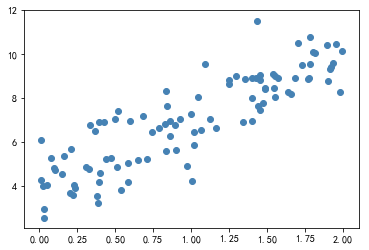

In [11]:
# 生成数据
np.random.seed(666)
x_1 = 2 * np.random.random(size=100)
y = x_1 * 3. + 4. + np.random.normal(size=100)

# 绘图
plt.figure()
plt.scatter(x_1, y, color='steelblue')
plt.show()

In [12]:
# 定义损失函数
def Func_J1(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [13]:
# 定义求梯度函数（用for的方法）
def grad1(theta, X_b, y):
    grad_j = np.empty(len(theta))
    grad_j[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        grad_j[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return grad_j * 2 / len(X_b)

In [14]:
# 定义梯度下降迭代函数
def gradient_descent1(X_b, y, initial_theta, eta=0.1, n_iters=1e4, epsilon=1e-8):
    
    theta = initial_theta
    theta_list = [initial_theta]
    i_iter = 0
    
    while i_iter < n_iters:
        theta_old = theta
        theta = theta - eta * grad1(theta_old, X_b, y)
        theta_list.append(theta)

        if abs(Func_J1(theta, X_b, y) - Func_J1(theta_old, X_b, y)) < epsilon:
            break

        i_iter += 1
        
    return theta, np.array(theta_list)

In [15]:
x_0 = np.ones((len(x_1), 1))
X_b = np.hstack([x_0, x_1.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])

theta, theta_list = gradient_descent1(X_b, y, initial_theta, eta=0.01, n_iters=1e4, epsilon=1e-8)
theta

array([4.02145786, 3.00706277])

#### 2、使用向量方式实现梯度下降

<Figure size 432x288 with 0 Axes>

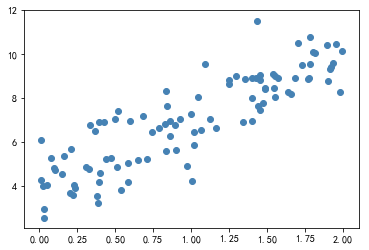

In [16]:
# 生成数据
np.random.seed(666)
x_1 = 2 * np.random.random(size=100)
y = x_1 * 3. + 4. + np.random.normal(size=100)

# 绘图
plt.figure()
plt.scatter(x_1, y, color='steelblue')
plt.show()

In [17]:
def Func_J2(theta, X_b, y):
    try:
        return (y - X_b.dot(theta)).T.dot(y - X_b.dot(theta))/ len(X_b)
    except:
        return float('inf')

In [18]:
# 用向量方法
def grad2(theta, X_b, y):
    return (X_b).T.dot(X_b.dot(theta) - y) * 2 / len(X_b)

In [19]:
# 定义梯度下降迭代函数
def gradient_descent2(X_b, y, initial_theta, eta=0.1, n_iters=1e4, epsilon=1e-8):
    
    theta = initial_theta
    theta_list = [initial_theta]
    i_iter = 0
    
    while i_iter < n_iters:
        theta_old = theta
        theta = theta - eta * grad2(theta_old, X_b, y)
        theta_list.append(theta)

        if abs(Func_J2(theta, X_b, y) - Func_J2(theta_old, X_b, y)) < epsilon:
            break

        i_iter += 1
        
    return theta, np.array(theta_list)

In [20]:
x_0 = np.ones((len(x_1), 1))
X_b = np.hstack([x_0, x_1.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])

theta, theta_list = gradient_descent2(X_b, y, initial_theta, eta=0.01, n_iters=1e4, epsilon=1e-8)
theta

array([4.02145786, 3.00706277])

### （三）封装

In [21]:
import numpy as np

# 使用for循环
class MY_LinearRegression:
    
    def __init__(self):
        '''初始化'''
        self.intercept_ = None
        self.coef_ = None
        self._theta =None
        
    def fit_normal(self, X_train, y_train):
        '''使用正规方程方法训练'''
        assert X_train.shape[0] == y_train.shape[0], 'X_train 和 y_train 的行数要一致'
        
        X_0 = np.ones(shape=(len(X_train), 1))
        X_b = np.hstack([X_0, X_train])
        
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4, epsilon=1e-8, method='f'):
        '使用梯度下降法进行训练'
        assert X_train.shape[0] == y_train.shape[0], 'X_train 和 y_train 的行数要一致'
        
        def Func_J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta))**2) / len(X_b)
            except:
                return float('inf')
                
        def grad(theta, X_b, y):
            # for循环
            if method == 'f':
                grad_j = np.empty(len(theta))
                grad_j[0] = np.sum(X_b.dot(theta) - y)
                for i in range(1, len(theta)):
                    grad_j[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
                return grad_j * 2 / len(X_b)
            # 向量法
            if method == 'm':
                    return (X_b).T.dot(X_b.dot(theta) - y) * 2 / len(X_b)
                
        # 定义梯度下降迭代函数
        def gradient_descent(X_b, y, initial_theta, eta, n_iters, epsilon):

            theta = initial_theta
            i_iter = 0

            while i_iter < n_iters:
                theta_old = theta
                theta = theta - eta * grad(theta_old, X_b, y)

                if abs(Func_J(theta, X_b, y) - Func_J(theta_old, X_b, y)) < epsilon:
                    break

                i_iter += 1

            return theta
        
        x_0 = np.ones((len(X_train), 1))
        
        if len(X_train.shape) == 1:
            X_train = X_train.reshape(-1,1)
            
        X_b = np.hstack([x_0, X_train])
        initial_theta = np.zeros(X_b.shape[1])

        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters, epsilon)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self

    def predict(self, X_predict):
        '''预测'''
        assert self.intercept_ is not None and self.coef_ is not None, '请先进行训练'
        assert X_predict.shape[1] == len(self.coef_), '特证个数必须与参数（非截距）个数相等'
        
        X_0 = np.ones(shape=(len(X_predict), 1))
        X_b = np.hstack([X_0, X_predict])
        
        return X_b.dot(self._theta) # y = X_b.dot(𝜃)
    
    def r2_score(self, X_test, y_test):
        '''模型评价R2'''
        y_test_predict = self.predict(X_test)
        mean_squared_error = np.sum((y_test - y_test_predict) ** 2) / len(y_test)
        return 1 - mean_squared_error / np.var(y_test)
    
    def __repr__(self):
        return 'MY_LinearRegression()'

In [22]:
# 导入波士顿房价数据
from sklearn import datasets

boston = datasets.load_boston()

# print(boston.DESCR)
# boston.feature_names

X = boston.data
y = boston.target

# 去除天花板值
X = X[y < 50.0]
y = y[y < 50.0]

X.shape
y.shape

(490, 13)

(490,)

In [23]:
# 切分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(392, 13)

(98, 13)

(392,)

(98,)

#### 1、正规方程训练

In [24]:
reg_n = MY_LinearRegression()
reg_n.fit_normal(X_train, y_train)
reg_n._theta 
reg_n.r2_score(X_test, y_test)

MY_LinearRegression()

array([ 3.41173997e+01, -1.20354261e-01,  3.64423279e-02, -3.61493155e-02,
        5.12978140e-02, -1.15775825e+01,  3.42740062e+00, -2.32311760e-02,
       -1.19487594e+00,  2.60101728e-01, -1.40219119e-02, -8.35430488e-01,
        7.80472852e-03, -3.80923751e-01])

0.8129794056212823

#### 2、梯度下降法（for循环方法训练）

In [25]:
reg_gd1 = MY_LinearRegression()
reg_gd1.fit_gd(X_train, y_train, eta=0.000001, method='f', n_iters=1e6)

MY_LinearRegression()

In [26]:
reg_gd1._theta
reg_gd1.r2_score(X_test, y_test)

array([ 4.35221240e-01, -1.07889200e-01,  5.91494760e-02, -5.72920411e-02,
        1.19334353e-01,  2.07223623e-01,  3.91254775e+00,  1.50564949e-03,
       -5.36511902e-01,  1.13424276e-01, -9.76209406e-03,  5.35544815e-02,
        1.58440412e-02, -3.78786162e-01])

0.7542932581943915

#### 3、梯度下降法（向量法训练）

In [27]:
reg_gd2 = MY_LinearRegression()
reg_gd2.fit_gd(X_train, y_train, eta=0.000001, method='m', n_iters=1e6)

MY_LinearRegression()

In [28]:
reg_gd2._theta
reg_gd2.r2_score(X_test, y_test)

array([ 4.35221240e-01, -1.07889200e-01,  5.91494760e-02, -5.72920411e-02,
        1.19334353e-01,  2.07223623e-01,  3.91254775e+00,  1.50564949e-03,
       -5.36511902e-01,  1.13424276e-01, -9.76209406e-03,  5.35544815e-02,
        1.58440412e-02, -3.78786162e-01])

0.7542932581943915

## 四、梯度下降法中数据归一化的必要性

通过上面的实际训练可以看出，梯度下降法相对于正规方程法，模型训练时间较长，原因之一就是因为我们在训练之前没有进行数据归一化。

为什么不进行数据归一化会导致梯度下降法的训练时间时间较长呢？我们以两参数模型的损失函数 $Cost = J(\theta_1, \theta_2)$ 为例。

首先我们必须知道，梯度下降的方向是与损失函数的等高线 $J(\theta_1, \theta_2) = C$（$C$ 为常数）的切线垂直的。为什么垂直？我们做如下证明：

已知曲面 $Cost = J(\theta_1, \theta_2)$，其等高线方程可以表示为：$J(\theta_1, \theta_2) = C$（$C$ 为常数）。我们对 $J(\theta_1, \theta_2) = C$ 两边同时进行微分，得：

$$
d J(\theta_1, \theta_2) = d{C} \Rightarrow \frac{\partial J}{\partial \theta_1}{d\theta_1} + \frac{\partial J}{\partial \theta_2}{d\theta_2} = 0 \Rightarrow (\frac{\partial J}{\partial \theta_1}, \frac{\partial J}{\partial \theta_2}) \bullet ({d\theta_1}, {d\theta_2}) = 0 \Rightarrow \pmb{\nabla Cost}({d\theta_1}, {d\theta_2}) = 0
$$

如上推导，我们可以看出梯度向量 $(\frac{\partial J}{\partial \theta_1}, \frac{\partial J}{\partial \theta_2})$ 与切向量 $({d\theta_1}, {d\theta_2})$ 的内积为0，因此两个向量垂直。又由于梯度下降的方向是梯度的反方向，因此梯度下降的方向也是与等高线切线垂直的。

知道梯度下降的方向与等高线切线垂直后，我们可以绘制两种情况下的损失函数等高线图，如下：

图一：
<img src='.\pic8.png' width='500'>

图二：
<img src='.\pic9.png' width='500'>

图一表示的是特征 $X_1$ 与特征 $X_2$ 的取值范围相近的情况，在这种情况下，等高线比较接近正圆。因此梯度下降的时候直奔最小值点去，因此迭代次数较少。

图二表示的是特征 $X_1$ 与特征 $X_2$ 的取值范围量级相差较大的情况，在这种情况下，等高线比较“消瘦”。梯度下降的时候会在下降过程中反复横跳，因此导致迭代次数较多。

由此上述可见，我们使用梯度下降法进行寻找最优解的时候，进行数据归一化是很有必要的！

In [29]:
# 对特征数据进行标准化
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
StandardScaler.fit(X_train)
X_train_standard = StandardScaler.transform(X_train)

StandardScaler()

In [30]:
reg_gd3 = MY_LinearRegression()
reg_gd3.fit_gd(X_train_standard, y_train, method='m')

MY_LinearRegression()

In [31]:
X_test_standard = StandardScaler.transform(X_test)
reg_gd3._theta
reg_gd3.r2_score(X_test_standard, y_test)

array([ 2.15007653e+01, -1.04042202e+00,  8.30933509e-01, -2.47943557e-01,
        1.17945567e-02, -1.35034756e+00,  2.25074000e+00, -6.63843534e-01,
       -2.53568774e+00,  2.25572406e+00, -2.34011572e+00, -1.76565394e+00,
        7.09233973e-01, -2.72677064e+00])

0.8129873310487505

通过运行时间和 $R^2$ 来看，在进行数据归一化后，整个训练时间缩短了很多（没进行数据归于化之前需要48s，归一化之后直用了238ms），并且从 $R^2$ 来看，模型的训练效果也有一定的提升。

## 五、梯度下降法相对于正规方程法的优势

当特征维度 $n$ 比较大时，正规方程的时间复杂度较大，但是梯度下降法训练速度就很快。以下以一个虚拟数据进行二者的比较：

In [32]:
# 生成虚拟数据
n = 10000
m = 1000

X = np.random.normal(size=(m, n))
true_theta = np.random.uniform(0.0, 50.0, size=n+1)
y = X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0.0, 10.0,size=m)

In [33]:
# 正规方程方法训练
reg_n = MY_LinearRegression()
reg_n.fit_normal(X, y)

MY_LinearRegression()

In [34]:
# 梯度下降法训练
reg_gd = MY_LinearRegression()
reg_gd.fit_gd(X, y, method='m')

MY_LinearRegression()

通过以上测试，梯度下降法的训练速度明显快于正规方程

## 六、随机“梯度”下降法

### （一）基本原理

####  1、“梯度”的计算

前述梯度下降法中，我们的梯度表示为：

$$
\pmb{\nabla}J(\theta)=\frac{2}{m}
\begin{pmatrix}
\sum_{i=1}^{m}(x_0^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\\ \\
\sum_{i=1}^{m}(x_1^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\\ \\
\sum_{i=1}^{m}(x_2^{(i)}){[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\\ \\
...
\\ \\
\sum_{i=1}^{m}(x_n^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\end{pmatrix}
_{(n+1) \times 1}
$$

这种梯度下降法在每次计算梯度时间，将所有的样本都进行了使用，我们称之为**批量梯度下降法**。**批量梯度下降法**在样本量很大时，使用矩阵计算梯度时十分耗时，因此我们考虑在每次计算梯度时，只考虑其中一个样本进行计算。即：

$$
\pmb{\nabla}J(\theta)=
\begin{pmatrix}
(x_0^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\\ \\
(x_1^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\\ \\
(x_2^{(i)}){[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\\ \\
...
\\ \\
(x_n^{(i)}) {[(\theta_0{x_0^{(i)}} + \theta_1{x_1^{(i)}} + \theta_2{x_2^{(i)}} + ... + \theta_n{x_n^{(i)}}) - (y^{(i)})]}
\end{pmatrix}
_{(n+1) \times 1}
$$

$$
\Downarrow
$$

$$
\pmb{\nabla} J(\theta) = 2({X_b^{(i)}})^{T}({X_b^{(i)}}{\theta} - {y^{(i)}})
$$

迭代式为：

$$\theta_{new} = \theta_{old} - \eta \nabla J(\theta_{old}) = \theta_{old} - \eta 2({X_b^{(i)}})^{T}({X_b^{(i)}}{\theta_{old}} - {y^{(i)}}))$$

这种方法我们称之为**随机梯度下降法**。标题之所以打上引号，其实是因为这里的计算方式，使得我们参数迭代的方向并不是沿着梯度的反方向，而是随机方向，因此并不能称为严格意义的“梯度下降”。

#### 2、学习率的计算

正如以上讨论，随机梯度下降法下，我们参数迭代的方向并不是严格的梯度反方向，因此并不能保证每次迭代都能使 $\pmb{\nabla} J(\theta)$ 减小，也不能保证每次迭代都能使损失函数 $J(\theta)$ 减小。因此可能存在当我们迭代到损失函数局部最小值附近时，由于迭代步长太大了，结果慢慢地又远离了最优解。因此我们需要人为地定义一个递减的的学习率，使得迭代量逐渐递减（批量梯度下降法下，每次的迭代量是天然递减的）。

因此我们定义学习率为：

$$
\eta = \frac{a}{i_iters + b}\\
其中：a \ 和\ b \ 均为常数（两个超参数）；i_{iters}为当前迭代的次数
$$

### （二）分步实现

In [35]:
# 生成模拟数据
m = 100000
np.random.seed(666)
x_1 = np.random.normal(size=m)
y = 4.*x_1 + 3. + np.random.normal(0, 3, size=m)

#### 1、使用批量梯度下降法训练

In [36]:
def Func_J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def Bgrad(theta, X_b, y):
    return (X_b).T.dot(X_b.dot(theta) - y) * 2 / len(X_b)

# 定义梯度下降迭代函数
def B_gradient_descent(X_b, y, initial_theta, eta=0.01, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    i_iter = 0
    i_iter_list = []
    J_list = []

    while i_iter < n_iters:
        theta_old = theta
        theta = theta - eta * Bgrad(theta_old, X_b, y)
        i_iter_list.append(i_iter)
        J = Func_J(theta, X_b, y)
        J_list.append(J)
        if abs(Func_J(theta, X_b, y) - Func_J(theta_old, X_b, y)) < epsilon:
            break

        i_iter += 1

    return theta, i_iter_list, J_list


In [37]:
x_0 = np.ones((len(x_1), 1))
x_1 = x_1.reshape(-1,1)
X_b = np.hstack([x_0, x_1])
initial_theta = np.zeros(X_b.shape[1])
theta, i_iter_list, J_list = B_gradient_descent(X_b, y, initial_theta)
theta

array([3.00545329, 4.00684163])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '批量梯度下降法损失函数变化图示')

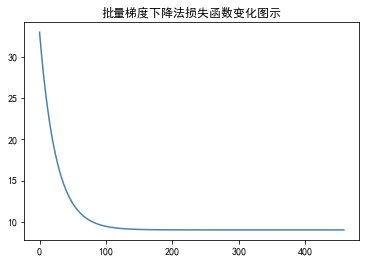

In [38]:
plt.figure()
plt.title('批量梯度下降法损失函数变化图示')
plt.plot(i_iter_list, J_list, color='steelblue')
plt.show()

#### 2、使用随机梯度下降法训练

In [39]:
def Func_J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def Sgrad(theta, X_b_i, y_i):
    return (X_b_i).T.dot(X_b_i.dot(theta) - y_i) * 2

def S_gradient_descent(X_b, y, initial_theta, n_iters=100, t0=5, t1=50):
    
    theta = initial_theta
    i_iter_list = []
    J_list = []
    
    # 定义学习率函数
    def learning_rate(i_iter):
        return t0 / (i_iter + t1)
    
    for i_iter in range(n_iters):
        theta_old = theta
        eta = learning_rate(i_iter)
        rand_i = np.random.randint(len(X_b))  # 建立一个随机索引
        grad = Sgrad(theta_old, X_b[rand_i], y[rand_i])
        theta = theta - eta * grad
        
        i_iter_list.append(i_iter)
        J = Func_J(theta, X_b, y)
        J_list.append(J)
        
    return theta, i_iter_list, J_list

In [40]:
x_0 = np.ones((len(x_1), 1))
x_1 = x_1.reshape(-1,1)
X_b = np.hstack([x_0, x_1])
initial_theta = np.zeros(X_b.shape[1])
n_iters = len(X_b)//3  # // 取整

theta, i_iter_list, J_list = S_gradient_descent(X_b, y, initial_theta, n_iters)
theta

array([2.91924481, 4.0059984 ])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, '随机梯度下降法损失函数变化图示')

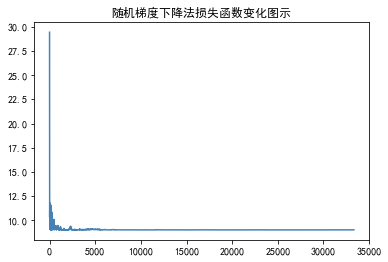

In [41]:
plt.figure()
plt.title('随机梯度下降法损失函数变化图示')
plt.plot(i_iter_list, J_list, color='steelblue')
plt.show()

比较“批量梯度下降”和“随机梯度下降”的损失函数变化曲线可以看出，“随机梯度下降”的损失函数会出现反复横跳的现象，这也是我们要人为定义一个递减的学习率的重要原因。

### （三）封装

In [42]:
import numpy as np

# 使用for循环
class MY_LinearRegression:
    
    def __init__(self):
        '''初始化'''
        self.intercept_ = None
        self.coef_ = None
        self._theta =None
     
    
    # 正规方程法    
    def fit_normal(self, X_train, y_train):
        '''使用正规方程方法训练'''
        assert X_train.shape[0] == y_train.shape[0], 'X_train 和 y_train 的行数要一致'
        
        X_0 = np.ones(shape=(len(X_train), 1))
        X_b = np.hstack([X_0, X_train])
        
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    
    # 批量梯度下降法
    def fit_bgd(self, X_train, y_train, eta=0.01, n_iters=1e4, epsilon=1e-8, method='f'):
        '使用批量梯度下降法进行训练'
        assert X_train.shape[0] == y_train.shape[0], 'X_train 和 y_train 的行数要一致'
        
        def Func_J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta))**2) / len(X_b)
            except:
                return float('inf')
                
        def b_grad(theta, X_b, y):
            # for循环
            if method == 'f':
                grad_j = np.empty(len(theta))
                grad_j[0] = np.sum(X_b.dot(theta) - y)
                for i in range(1, len(theta)):
                    grad_j[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
                return grad_j * 2 / len(X_b)
            # 向量法
            if method == 'm':
                    return (X_b).T.dot(X_b.dot(theta) - y) * 2 / len(X_b)
                
        # 定义梯度下降迭代函数
        def b_gradient_descent(X_b, y, initial_theta, eta, n_iters, epsilon):

            theta = initial_theta
            i_iter = 0

            while i_iter < n_iters:
                theta_old = theta
                theta = theta - eta * b_grad(theta_old, X_b, y)

                if abs(Func_J(theta, X_b, y) - Func_J(theta_old, X_b, y)) < epsilon:
                    break

                i_iter += 1

            return theta
        
        x_0 = np.ones((len(X_train), 1))
        
        if len(X_train.shape) == 1:
            X_train = X_train.reshape(-1,1)
            
        X_b = np.hstack([x_0, X_train])
        initial_theta = np.zeros(X_b.shape[1])

        self._theta = b_gradient_descent(X_b, y_train, initial_theta, eta, n_iters, epsilon)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    
    # 随机梯度下降法
    def fit_sgd(self, X_train, y_train, n_iters=5, epsilon=1e-8, t0=5, t1=50):
        '使用随机梯度下降法进行训练'
        assert X_train.shape[0] == y_train.shape[0], 'X_train 和 y_train 的行数要一致'
        
        def Func_J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta))**2) / len(X_b)
            except:
                return float('inf')
                
        def s_grad(theta, X_b_i, y_i):
            return (X_b_i).T.dot(X_b_i.dot(theta) - y_i) * 2
                
        # 定义梯度下降迭代函数
        def s_gradient_descent(X_b, y, initial_theta, n_iters, t0, t1):

            theta = initial_theta

            # 定义学习率函数
            def learning_rate(i_iter):
                return t0 / (i_iter + t1)
            
            m = len(X_b)
            
            for i in range(n_iters):  # n_iters表示看几遍样本
                # 将样本打乱顺序
                indexs = np.random.permutation(m) 
                X_b_new = X_b[indexs,:]
                y_new = y[indexs]
                
                # 遍历当前样本集
                for i_iter in range(m):
                    theta_old = theta
                    eta = learning_rate(i * m + i_iter)
                    grad = s_grad(theta_old, X_b[i_iter], y[i_iter])
                    theta = theta - eta * grad

            return theta
        
        x_0 = np.ones((len(X_train), 1))
        
        if len(X_train.shape) == 1:
            X_train = X_train.reshape(-1,1)
            
        X_b = np.hstack([x_0, X_train])
        initial_theta = np.zeros(X_b.shape[1])

        self._theta = s_gradient_descent(X_b, y_train, initial_theta, n_iters, t0, t1)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    

    def predict(self, X_predict):
        '''预测'''
        assert self.intercept_ is not None and self.coef_ is not None, '请先进行训练'
        assert X_predict.shape[1] == len(self.coef_), '特证个数必须与参数（非截距）个数相等'
        
        X_0 = np.ones(shape=(len(X_predict), 1))
        X_b = np.hstack([X_0, X_predict])
        
        return X_b.dot(self._theta) # y = X_b.dot(𝜃)
    
    def r2_score(self, X_test, y_test):
        '''模型评价R2'''
        y_test_predict = self.predict(X_test)
        mean_squared_error = np.sum((y_test - y_test_predict) ** 2) / len(y_test)
        return 1 - mean_squared_error / np.var(y_test)
    
    def __repr__(self):
        return 'MY_LinearRegression()'

#### 1、模拟数据验证

In [43]:
# 生成模拟数据
m = 100000
np.random.seed(666)
X_train = np.random.normal(size=m)
y_train = 4.*X_train + 3. + np.random.normal(0, 3, size=m)

In [44]:
# 批量梯度下降
reg_bgd = MY_LinearRegression()
reg_bgd.fit_bgd(X_train, y_train, method='m')
reg_bgd._theta

MY_LinearRegression()

array([3.00545329, 4.00684163])

In [45]:
# 随机梯度下降
reg_sgd = MY_LinearRegression()
reg_sgd.fit_sgd(X_train, y_train, n_iters=1)
reg_sgd._theta

MY_LinearRegression()

array([3.01080423, 4.02101668])

#### 2、波士顿房价数据

In [46]:
# 导入波士顿房价数据
from sklearn import datasets

boston = datasets.load_boston()

# print(boston.DESCR)
# boston.feature_names

X = boston.data
y = boston.target

# 去除天花板值
X = X[y < 50.0]
y = y[y < 50.0]

X.shape
y.shape

# 切分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

# 数据归一化
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
StandardScaler.fit(X_train)
X_train_standard = StandardScaler.transform(X_train)
X_test_standard = StandardScaler.transform(X_test)

(490, 13)

(490,)

(392, 13)

(98, 13)

(392,)

(98,)

StandardScaler()

In [47]:
# 批量梯度下降
reg_bgd = MY_LinearRegression()
reg_bgd.fit_bgd(X_train_standard, y_train, eta=0.000001, method='m', n_iters=1e6)
reg_bgd._theta
reg_bgd.r2_score(X_test_standard, y_test)

MY_LinearRegression()

array([18.59095896, -0.69059003,  0.32247362, -0.68061665,  0.14204186,
       -0.42918046,  2.47620423, -0.52540328, -0.96823448,  0.12960676,
       -0.65355466, -1.4568469 ,  0.62647243, -2.23934191])

0.6656195606376432

In [48]:
# 随机梯度下降
reg_sgd = MY_LinearRegression()
reg_sgd.fit_sgd(X_train_standard, y_train, n_iters=100)
reg_sgd._theta
reg_sgd.r2_score(X_test_standard, y_test)

MY_LinearRegression()

array([21.49809059, -0.99358571,  0.76910655, -0.41665018,  0.03181092,
       -1.32359445,  2.2806571 , -0.68096115, -2.54630425,  1.79711344,
       -1.83313117, -1.75496499,  0.70834094, -2.72458642])

0.8132950633639209

### （四）scikit - learn 中的随机梯度下降法

In [49]:
from sklearn.linear_model import SGDRegressor

# sklearn中的随机梯度下降 浏览样本遍数 n_iter_no_change 选择默认
s_reg_sgd = SGDRegressor()
s_reg_sgd.fit(X_train_standard, y_train)
s_reg_sgd.score(X_test_standard, y_test)

SGDRegressor()

0.8129254242161922

In [50]:
# sklearn中的随机梯度下降 浏览样本遍数 n_iter_no_change=100
s_reg_sgd_100 = SGDRegressor(n_iter_no_change=100)
s_reg_sgd_100.fit(X_train_standard, y_train)
s_reg_sgd_100.score(X_test_standard, y_test)

SGDRegressor(n_iter_no_change=100)

0.8129364925974142

## 七、梯度的调试

前述我们都是通过数学推导的方式得出计算梯度的公式，但是对于一些复杂的损失函数来说，推导梯度计算公式并不是那么容易的事情，很可能会出现推导错误的情况。那么我们怎样验证推导的计算方法的准确性呢？

首先，我们引入一个近似表示函数在某点的导数的方法，如图：

<img src='.\pic10.png' width=500>

如图，我们可以使用 $\frac{dJ}{d\theta} = \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2\varepsilon} (\varepsilon \rightarrow 0)$ 近似表示损失函数 $J(\theta)$ 在点 $(\theta, J(\theta)$ 处的导数。

上述方法对于高维同样适用。

如下

$$
\begin{align}
& \theta = (\theta_0, \theta_1, \theta_2, ..., \theta_n)
\\ \\
& \nabla J(\theta) =(
\frac {\partial J(\theta)}{\partial \theta_0}
,\frac {\partial J(\theta)}{\partial \theta_1}
,\frac {\partial J(\theta)}{\partial \theta_2} 
,...
,\frac {\partial J(\theta)}{\partial \theta_n})
\end{align}
$$

令：

$$
\begin{align}
& \theta_0^{+} = (\theta_0 + \varepsilon, \theta_1, \theta_2, ..., \theta_n)\\
& \theta_0^{-} = (\theta_0 - \varepsilon, \theta_1, \theta_2, ..., \theta_n)
\end{align}
$$

则：

$$
\frac {\partial J(\theta)}{\partial \theta_0} = \frac{J(\theta_0^{+} - J(\theta_0^{-})}{2\varepsilon}
$$

同理可以推出 $J(\theta)$ 关于其他参数的偏导数。因此梯度可以表示为：

$$
\nabla J(\theta) =
\begin{pmatrix}
\frac {\partial J(\theta)}{\partial \theta_0}
\\ \frac {\partial J(\theta)}{\partial \theta_1}
\\ \frac {\partial J(\theta)}{\partial \theta_2} 
\\ ...
\\ \frac {\partial J(\theta)}{\partial \theta_n}
\end{pmatrix}
=
\begin{pmatrix}
\frac{J(\theta_0^{+} - J(\theta_0^{-})}{2\varepsilon}
\\ \\ \frac{J(\theta_1^{+} - J(\theta_1^{-})}{2\varepsilon}
\\ \\ \frac{J(\theta_2^{+} - J(\theta_2^{-})}{2\varepsilon}
\\ \\ ...
\\ \\ \frac{J(\theta_n^{+} - J(\theta_n^{-})}{2\varepsilon}
\end{pmatrix}
$$


In [51]:
def Func_J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def b_grad_math(theta, X_b, y):
    return (X_b).T.dot(X_b.dot(theta) - y) * 2 / len(X_b)

def b_grad_debug(theta, X_b, y, epsilon=0.001):
    grad = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        grad[i] = (Func_J(theta_1, X_b, y) - Func_J(theta_2, X_b, y)) / (2 * epsilon)
        
    return grad
    

# 定义梯度下降迭代函数
def b_gradient_descent(grad_method, X_b, y, initial_theta, eta=0.01, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    i_iter = 0

    while i_iter < n_iters:
        theta_old = theta
        theta = theta - eta * grad_method(theta_old, X_b, y)

        if abs(Func_J(theta, X_b, y) - Func_J(theta_old, X_b, y)) < epsilon:
            break

        i_iter += 1

    return theta

In [52]:
# 生成虚拟数据
np.random.seed(666)
X = np.random.random(size=(1000, 10))

true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [53]:
# 使用推导方式计算的梯度
initial_theta = np.zeros(X_b.shape[1])
theta = b_gradient_descent(b_grad_math, X_b, y, initial_theta)
theta

array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [54]:
# 使用近似的方式计算梯度
initial_theta = np.zeros(X_b.shape[1])
theta = b_gradient_descent(b_grad_debug, X_b, y, initial_theta)
theta

array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

如上所示，近似方式计算的梯度训练效果也比较好，但是其时间复杂度较高，一次一般不采用这种方法。但是我们可以将其应用到梯度验证上。我们在处理一些比较复杂的损失函数的时候，可以先用近似的方法计算梯度，然后进行训练。再对我们推导出的梯度计算方法进行验证。

## 八、总结

### （一）梯度下降法分类

梯度下降法主要包括：

#### 1、批量梯度下降法 （Batch Gradient Descent）
- 该种梯度下降法比较稳定，一定能够走向局部最小值，但是时间复杂度较大。
    
#### 2、随机梯度下降法 （Stochastic Gradient Descent）
- 该种梯度下降法由于每次并不是朝着梯度的反方向进行前进，所以不一定能够走到局部最小值，因此不是很稳定，但是时间复杂度较小。
    
#### 3、小批量梯度下降法 （Mini-Batch Gradient Descent）
- 该种梯度下降法是结合了以上两种方法，每次计算“梯度”时考虑k个样本。降低了两者单独呈现的缺点。

### （二）随机的力量

1、跳出局部最优解

2、更快的运行速度

3、随机搜索；随机森林